In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna
import pickle

In [58]:
df = pd.read_csv('diamond_preprocessed.csv')

X = df.drop(columns=["carat"])
Y = df["carat"]
splitRatio = int(len(X)*0.8)
X_train ,X_test= X[:splitRatio] , X[splitRatio:]
y_train , y_test = Y[:splitRatio], Y[splitRatio:]

In [59]:
class RidgeRegression():
    def __init__(self,lambd) -> None:
        self.lambd = lambd
    def fit(self,X, y):
        XTX = np.dot(X.T,X)
        identity_matrix = np.eye(X.shape[1])
        INV = np.linalg.inv(XTX + self.lambd * identity_matrix)
        DOT =  np.dot(INV, X.T)
        final = np.dot(DOT,y)
        return final
    def Predict(self,w,X):
        return np.dot(X,w)
    def MSE(self,y_actuals,y_pred):
        return np.mean((y_actuals-y_pred)**2)

In [60]:
model = RidgeRegression(lambd=0.1)
w = model.fit(X_train, y_train)
y_pred = model.Predict(w,X_test)


mse = model.MSE(y_test, y_pred)
print(f"Ridge Regression MSE: {mse}")


Ridge Regression MSE: 0.0037061421962114142


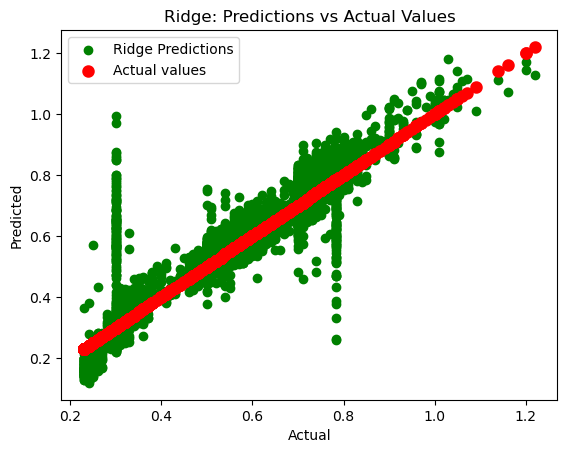

In [68]:
plt.scatter(y_test, y_pred, color='green', label='Ridge Predictions')
plt.scatter(y_test, y_test, color='red', label='Actual values', linewidth=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge: Predictions vs Actual Values')
plt.legend()
plt.show()

In [62]:
def objective(trial):
    lambda_value = trial.suggest_loguniform('alpha', 0.00001, 100) 
    model = RidgeRegression(lambda_value)
    w = model.fit(X_train, y_train)
    y_pred = model.Predict(w,X_test)
    mse = model.MSE(y_test, y_pred)
    return mse

In [63]:

study = optuna.create_study(direction='minimize')

study.optimize(objective, n_trials=100)

print("Best hyperparameters: ", study.best_params)
print("Best mean squared error: ", study.best_value)


[I 2024-10-04 18:49:16,140] A new study created in memory with name: no-name-9ec6f4d0-51f9-4c51-91f7-8172a38e3f94
/var/folders/wk/3h_3p7yj55q5prg62hx26fx00000gn/T/ipykernel_21584/3070219440.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_value = trial.suggest_loguniform('alpha', 0.00001, 100)
[I 2024-10-04 18:49:16,244] Trial 0 finished with value: 0.00370619832868214 and parameters: {'alpha': 6.599213218558222e-05}. Best is trial 0 with value: 0.00370619832868214.
/var/folders/wk/3h_3p7yj55q5prg62hx26fx00000gn/T/ipykernel_21584/3070219440.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_value = trial.suggest_loguniform('alpha', 0.00001, 100)
[I 202

Best hyperparameters:  {'alpha': 99.7624999226659}
Best mean squared error:  0.0036666765823845865


In [ ]:
# Best hyperparameters:  {'alpha': 99.7624999226659}
# Best mean squared error:  0.0036666765823845865

In [65]:
model = RidgeRegression(lambd=99.7624999226659)
model.fit(X_train, y_train)
with open('Nikhil_Gishnu_assignment1_part3.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!
